In [1]:
from imagehash import average_hash, phash, dhash, whash
from PIL import Image
import networkx as nx
from glob import glob
import os
from itertools import combinations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#Flávio:

def get_image_hashes(img_path: str) -> dict:
    """
    Returns the perceptual hashes of an image.
    :param img_path: path to the image to be hashed
    :return: hash value
    """
    im = Image.open(img_path)
    hashes = {}
    for hn, h in {'ahash': average_hash, 'phash': phash, 'dhash': dhash, 'whash': whash}.items():
        hashes[hn] = h(im)
    return hashes

In [3]:
#Flávio:
def build_proximity_network(path: str, ftype: str = 'JPG'):
    """
    From a directory of images build a network in which the edges are weighted according to
    imagehash distances
    :param ftype: extension of images
    :param path: directory where imags are located
    :return:
    """
    Net = nx.Graph()
    hashes = {}
    os.chdir(path)
    for imname in glob('**/*.{}'.format(ftype), recursive=True):
        print(imname)
        im = Image.open(imname)
        hashes[imname] = phash(im)
    for a, b in combinations(hashes, 2):
        hamm_dist = hashes[a] - hashes[b]
        Net.add_edge(a, b, weight=hamm_dist)

    return Net

C:\Users\orgle\Desktop\SRI2018\fingerprinting
falso\IMG_2842.JPG
falso\IMG_2843.JPG
falso\IMG_2844.JPG
falso\IMG_2845.JPG
falso\IMG_2846.JPG
falso\IMG_2847.JPG
falso\IMG_2848.JPG
falso\IMG_2849.JPG
falso\IMG_2850.JPG
falso\IMG_2851.JPG
falso\IMG_2852.JPG
falso\IMG_2853.JPG
falso\IMG_2854.JPG
falso\IMG_2855.JPG
falso\IMG_2856.JPG
falso\IMG_2857.JPG
falso\IMG_2858.JPG
falso\IMG_2859.JPG
falso\IMG_2860.JPG
falso\IMG_2861.JPG
falso\IMG_2862.JPG
falso\IMG_2863.JPG
falso\IMG_2864.JPG
falso\IMG_2865.JPG
falso\IMG_2866.JPG
falso\IMG_2867.JPG
falso\IMG_2868.JPG
falso\IMG_2869.JPG
falso\IMG_2870.JPG
falso\IMG_2871.JPG
falso\IMG_2872.JPG
falso\IMG_2873.JPG
falso\IMG_2874.JPG
falso\IMG_2875.JPG
falso\IMG_2876.JPG
falso\IMG_2877.JPG
falso\IMG_2878.JPG
falso\IMG_2879.JPG
falso\IMG_2880.JPG
falso\IMG_2881.JPG
falso\IMG_2938.JPG
falso\IMG_2939.JPG
falso\IMG_2940.JPG
falso\IMG_2941.JPG
falso\IMG_2942.JPG
falso\IMG_2943.JPG
falso\IMG_2944.JPG
falso\IMG_2945.JPG
falso\IMG_2946.JPG
falso\IMG_2947.JPG
fals

verdadeiro\IMG_3119.JPG
verdadeiro\IMG_3120.JPG
verdadeiro\IMG_3121.JPG
verdadeiro\IMG_3122.JPG
verdadeiro\IMG_3123.JPG
verdadeiro\IMG_3124.JPG
verdadeiro\IMG_3125.JPG
verdadeiro\IMG_3126.JPG
verdadeiro\IMG_3127.JPG
verdadeiro\IMG_3128.JPG
verdadeiro\IMG_3129.JPG
verdadeiro\IMG_3130.JPG
verdadeiro\IMG_3131.JPG
verdadeiro\IMG_3132.JPG
verdadeiro\IMG_3133.JPG
verdadeiro\IMG_3134.JPG
verdadeiro\IMG_3135.JPG
verdadeiro\IMG_3136.JPG
verdadeiro\IMG_3137.JPG
verdadeiro\IMG_3138.JPG
verdadeiro\IMG_3139.JPG
verdadeiro\IMG_3140.JPG
verdadeiro\IMG_3141.JPG
verdadeiro\IMG_3142.JPG
verdadeiro\IMG_3143.JPG
verdadeiro\IMG_3144.JPG
verdadeiro\IMG_3145.JPG
verdadeiro\IMG_3146.JPG
verdadeiro\IMG_3147.JPG
verdadeiro\IMG_3148.JPG
verdadeiro\IMG_3149.JPG
verdadeiro\IMG_3150.JPG
verdadeiro\IMG_3151.JPG
verdadeiro\IMG_3152.JPG
verdadeiro\IMG_3153.JPG
verdadeiro\IMG_3154.JPG
verdadeiro\IMG_3155.JPG
verdadeiro\IMG_3156.JPG
verdadeiro\IMG_3157.JPG
verdadeiro\IMG_3158.JPG
verdadeiro\IMG_3159.JPG
verdadeiro\IMG_3

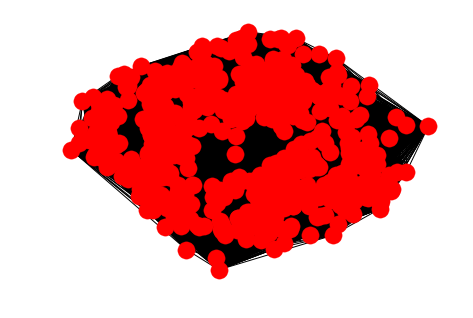

In [4]:
print(os.getcwd())
#Flávio:
path='..\\Dados\\train\\'
G = build_proximity_network(path)
print(nx.to_numpy_matrix(G))
nx.draw(G)
plt.axis('off')
plt.show()

In [5]:
Mtx=nx.to_numpy_matrix(G)
df=pd.DataFrame(Mtx)
print(len(df))

656


In [6]:
print(os.getcwd())

C:\Users\orgle\Desktop\SRI2018\Dados\train


In [7]:
def getname(path:str,ftype: str = 'JPG'):
    cols=list()
    for imname in glob('**/*.{}'.format(ftype), recursive=True):
        cols.append(imname)
    return(cols)

In [8]:
cols=getname(path)

In [9]:
df.columns=cols
df.index=cols

In [10]:
df.head()

falso\IMG_2842.JPG  falso\IMG_2843.JPG  \
falso\IMG_2842.JPG                 0.0                 6.0   
falso\IMG_2843.JPG                 6.0                 0.0   
falso\IMG_2844.JPG                 4.0                 4.0   
falso\IMG_2845.JPG                10.0                 6.0   
falso\IMG_2846.JPG                16.0                12.0   

                    falso\IMG_2844.JPG  falso\IMG_2845.JPG  \
falso\IMG_2842.JPG                 4.0                10.0   
falso\IMG_2843.JPG                 4.0                 6.0   
falso\IMG_2844.JPG                 0.0                 6.0   
falso\IMG_2845.JPG                 6.0                 0.0   
falso\IMG_2846.JPG                12.0                 6.0   

                    falso\IMG_2846.JPG  falso\IMG_2847.JPG  \
falso\IMG_2842.JPG                16.0                20.0   
falso\IMG_2843.JPG                12.0                16.0   
falso\IMG_2844.JPG                12.0                16.0   
falso\IMG_2845.JPG                 6.0                10.0   
falso\IMG_2846.JPG                 0.0                 6.0   

                    falso\IMG_2848.JPG  falso\IMG_2849.JPG  \
falso\IMG_2842.JPG                22.0                28.0   
falso\IMG_2843.JPG                20.0                28.0   
falso\IMG_2844.JPG                20.0                28.0   
falso\IMG_2845.JPG                14.0                22.0   
falso\IMG_2846.JPG                14.0                20.0   

                    falso\IMG_2850.JPG  falso\IMG_2851.JPG  \
falso\IMG_2842.JPG                22.0                24.0   
falso\IMG_2843.JPG                28.0                30.0   
falso\IMG_2844.JPG                24.0                26.0   
falso\IMG_2845.JPG                24.0                32.0   
falso\IMG_2846.JPG                24.0                34.0   

                                        ...                       \
falso\IMG_2842.JPG                      ...                        
falso\IMG_2843.JPG                      ...                        
falso\IMG_2844.JPG                      ...                        
falso\IMG_2845.JPG                      ...                        
falso\IMG_2846.JPG                      ...                        

                    verdadeiro\marcelo_ribeiro_verdadeiro 41.JPG  \
falso\IMG_2842.JPG                                          26.0   
falso\IMG_2843.JPG                                          28.0   
falso\IMG_2844.JPG                                          28.0   
falso\IMG_2845.JPG                                          26.0   
falso\IMG_2846.JPG                                          28.0   

                    verdadeiro\marcelo_ribeiro_verdadeiro 42.JPG  \
falso\IMG_2842.JPG                                          36.0   
falso\IMG_2843.JPG                                          34.0   
falso\IMG_2844.JPG                                          34.0   
falso\IMG_2845.JPG                                          30.0   
falso\IMG_2846.JPG                                          30.0   

                    verdadeiro\marcelo_ribeiro_verdadeiro 43.JPG  \
falso\IMG_2842.JPG                                          32.0   
falso\IMG_2843.JPG                                          32.0   
falso\IMG_2844.JPG                                          30.0   
falso\IMG_2845.JPG                                          26.0   
falso\IMG_2846.JPG                                          24.0   

                    verdadeiro\marcelo_ribeiro_verdadeiro 44.JPG  \
falso\IMG_2842.JPG                                          32.0   
falso\IMG_2843.JPG                                          32.0   
falso\IMG_2844.JPG                                          30.0   
falso\IMG_2845.JPG                                          26.0   
falso\IMG_2846.JPG                                          24.0   

                    verdadeiro\marcelo_ribeiro_verdadeiro 45.JPG  \
falso\IMG_2842.JPG                        

C:\Users\orgle\anac\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


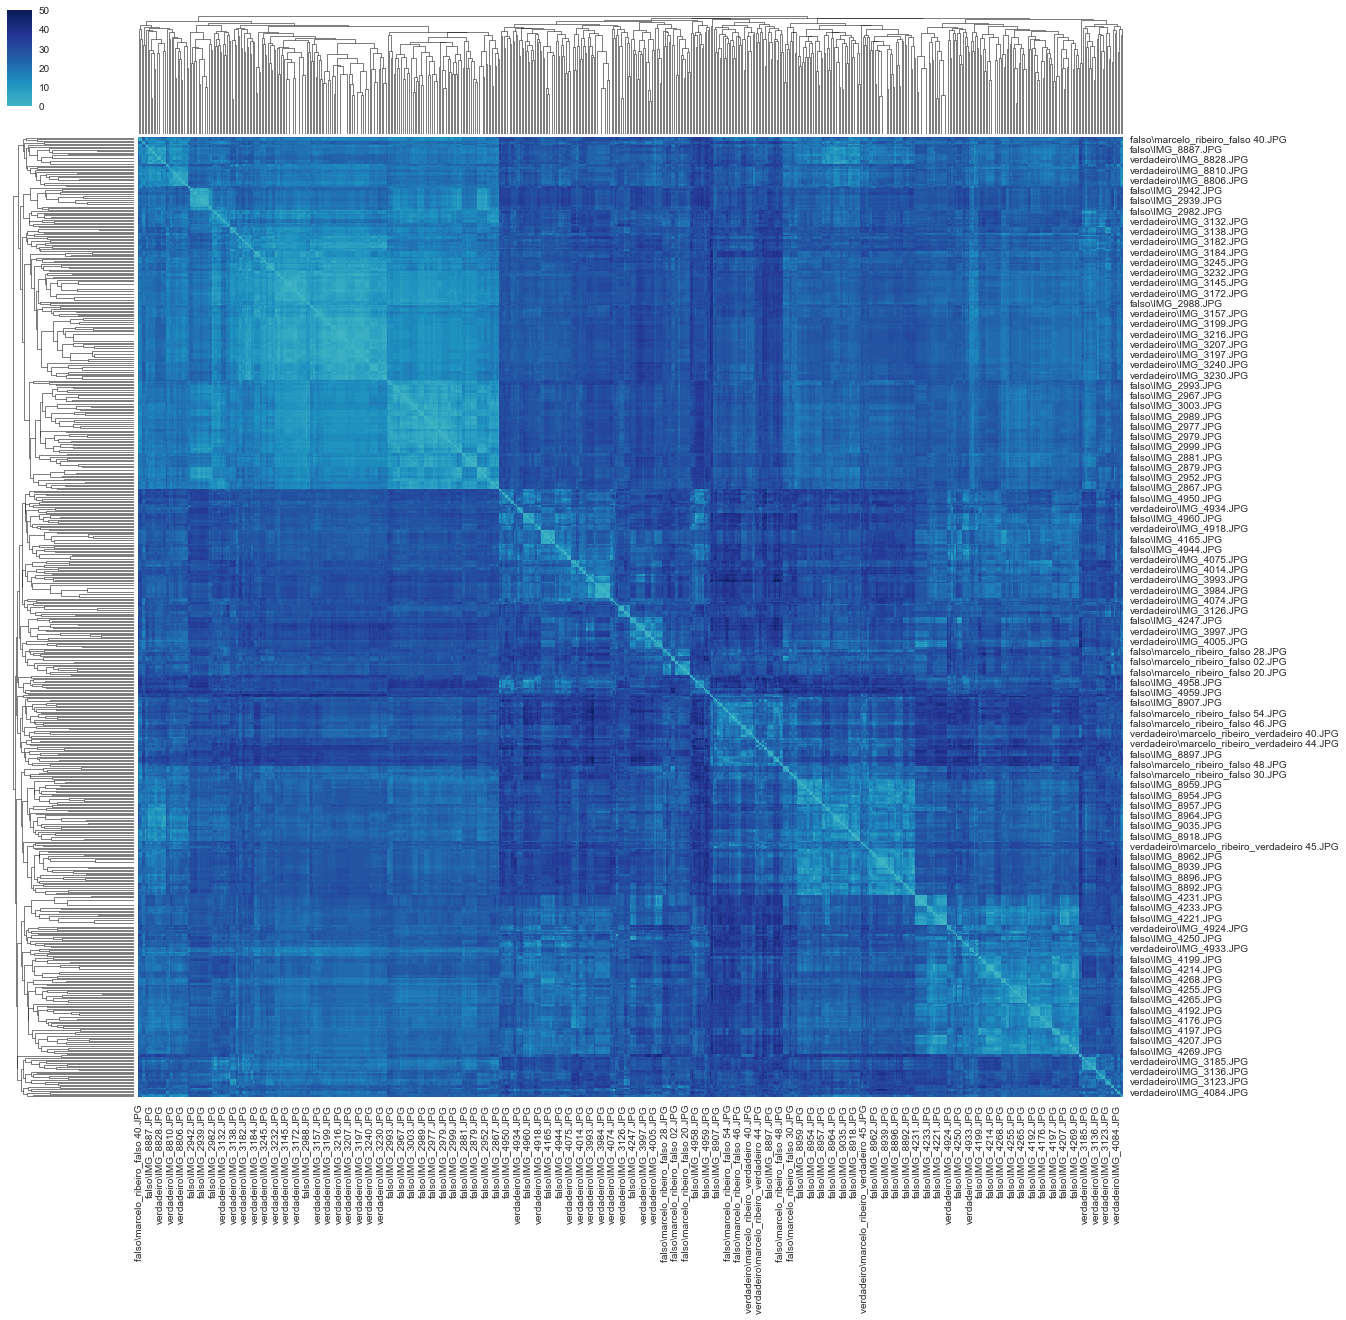

In [11]:
sns.clustermap(df, center=0,cmap="YlGnBu", figsize=(20, 20),metric='hamming')
plt.savefig('dendograma.JPG')
plt.show()